# Lab | Matplotlib & Seaborn

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots.

Also, play around with the linewidth and style. Use the ones you're most happy with.

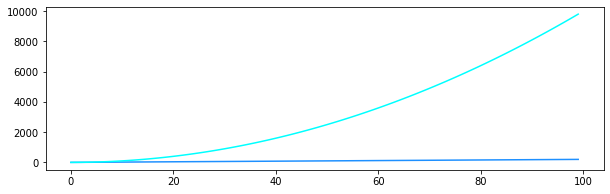

In [3]:
# OPTION 1
# Create a figure of a fixed size
plt.figure(figsize=(10,3))

# First plot
plt.plot(x,y,'dodgerblue')


# Second plot
plt.plot(x,z,'cyan')

# Show the plot
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

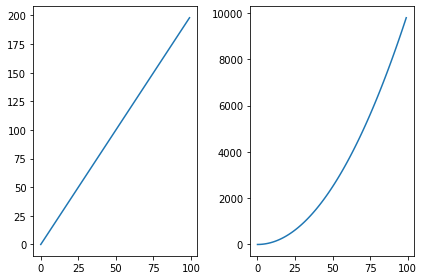

In [4]:
# OPTION 2

# Create a figure of a fixed size and axes
f,(ax1,ax2)= plt.subplots(nrows=1, ncols= 2)
# Plots
ax1.plot(x,x*2)
ax2.plot(x,x**2)
# Show the plot
plt.tight_layout()
plt.show()

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

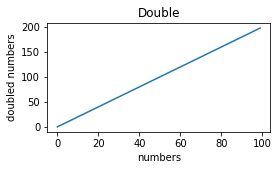

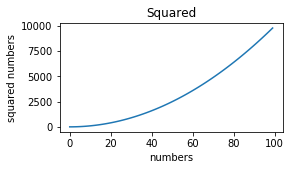

In [5]:
# ENHANCED VERSION to see more matplotlib features

# Variables
fs = 16 # fontsize
fw = 700 # fontweight
lw = 3 # lineweight
y_rot = 0 # ylabel rotation

# Create a figure of a fixed size and axes
fig, ax1 = plt.subplots(figsize=(4,2))
fig, ax2 = plt.subplots(figsize=(4,2))

# First plot adding a title and x and y labels
ax1.set_title("Double")
ax1.set_xlabel("numbers")
ax1.set_ylabel("doubled numbers")
ax1.plot(x,x*2)

# Second plot adding a title and x and y labels
ax2.set_title("Squared")
ax2.set_xlabel("numbers")
ax2.set_ylabel("squared numbers")
ax2.plot(x,x**2)

# Show the plot
plt.show()


#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

ValueError: provided too many kwargs, can only pass {'basex', 'subsx', nonposx'} or {'basey', 'subsy', nonposy'}.  You passed {'base': 2}

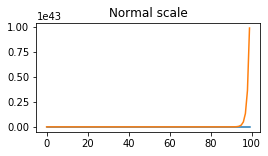

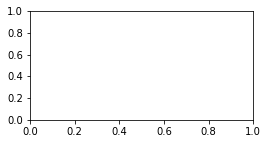

In [12]:
x = np.arange(0,100)
# Create a figure of a fixed size and axes
fig, ax1 = plt.subplots(figsize=(4,2))
fig, ax2 = plt.subplots(figsize=(4,2))
# Normal plot
ax1.plot(x,x^2)
ax1.plot(x,np.exp(x))
ax1.set_title("Normal scale")

# Logarithmic scale
ax2.set_yscale("log",base=2)
ax2.plot(x,x^2)
ax2.plot(x,np.exp(x))
ax2.set_title("Logarithmic scale")

# Show plot
plt.show()
#paolo: can you check this error?

ValueError: provided too many kwargs, can only pass {'basex', 'subsx', nonposx'} or {'basey', 'subsy', nonposy'}.  You passed {'base': 2}

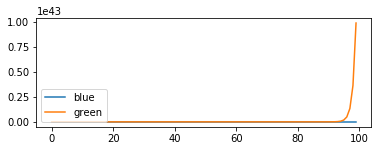

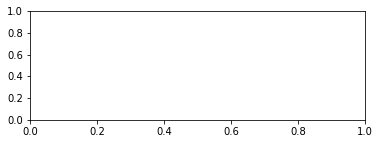

In [7]:
# ALTERNATIVE WITH LEGEND

# Create a figure of a fixed size and axes
#fig = plt.figure()
#axes = fig.subplots(nrows=4,ncols=2)
fig, ax1 = plt.subplots(figsize=(6,2))
fig, ax2 = plt.subplots(figsize=(6,2))

# Normal plot
ax1.plot(x,x^2,label = 'Squared')
ax1.plot(x,np.exp(x),label = 'Exponential')  
leg = ax1.legend(["blue","green"],loc ="lower left")

# Logarithmic scale
ax2.set_yscale("log",base=2)
ax2.plot(x,x^2,label='Squared')
ax2.plot(x,np.exp(x),label='Exponential')
leg = ax2.legend(["blue","green"],loc = "lower left")

# Show plot
plt.show()
#paolo: can you check this error?

# Challenge 2

Import the Fitbit2.csv file and name your dataset fitbit. Download the data from [here](https://drive.google.com/file/d/17TW-w-izKuR7bLoa0Mnyp9YN9zEQNXq-/view?usp=sharing) and place it in the data folder. Access it through a relative path.

In [8]:
# Read the data
fitbit = pd.read_csv('data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month.
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.

Hints:

- Use Months_encoded and Week_or Weekend columns.
- Use matplolib.pyplot object oriented API.
- Set your size figure to 12,4
- Explore plt.sca
- Explore plt.xticks
- Save your figures

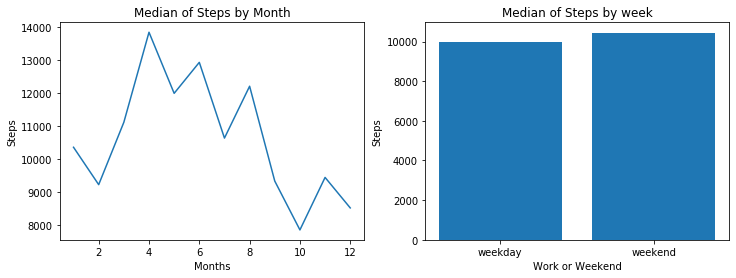

In [9]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
steps_month = fitbit.groupby("Months_encoded")[["Steps"]].median().reset_index()
steps_month 

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (12,4))

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(ax[0])

# Plot the weekday steps in the current axes
x = steps_month['Months_encoded']
y = steps_month['Steps']
plt.plot(x,y)

# Add labels, title, etc
plt.xlabel("Months")
plt.ylabel("Steps")
plt.title("Median of Steps by Month")

# Save the figure
plt.savefig('monthly_median.png')

# MEDIAN STEPS BY WORK_OR_WEEKEND

# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(ax[1])

# Find the median steps for workdays and weekdays
steps_week = fitbit.groupby("Work_or_Weekend")[["Steps"]].median().reset_index()

# Plot the workday and weekend steps in the current axes
x = steps_week['Work_or_Weekend']
y = steps_week['Steps']
plt.bar(x,y)

# Add labels, title, etc
plt.xlabel("Work or Weekend")
plt.ylabel("Steps")
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['weekday','weekend'])
plt.title("Median of Steps by week")

# Save the figure
plt.savefig('weekly_median.png')

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

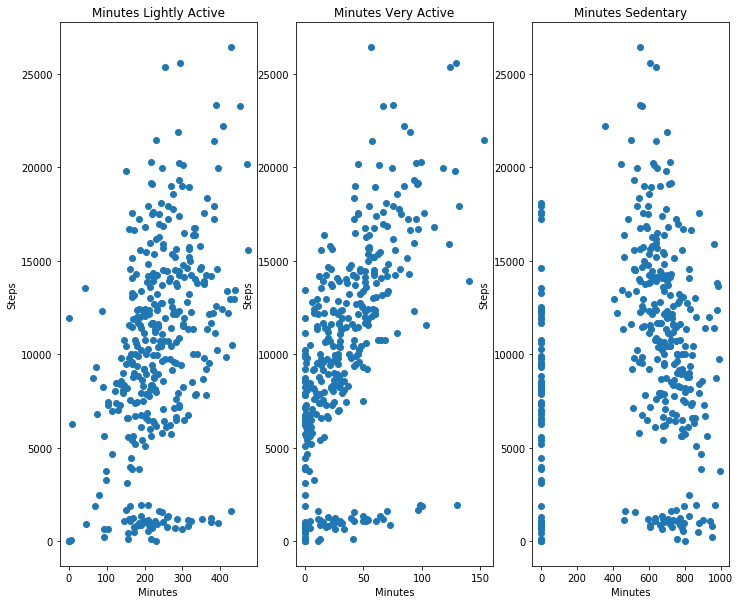

In [10]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
col= ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
df = fitbit[['Steps','Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']] 
#df.head()

# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1,ncols=3,figsize = (12,10))

x = fitbit['Steps']
y = fitbit[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]

# Iterate to draw each scatter plot
for pos, column in enumerate(col):   # Pick a first col
    plt.sca(ax[pos])
    plt.scatter(df[column], df['Steps'])
    plt.title(column)
    plt.xlabel('Minutes')
    plt.ylabel('Steps')
plt.show()

Text(0, 0.5, 'Steps')

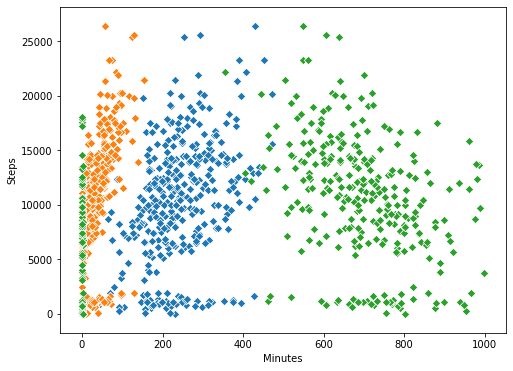

In [11]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 


# Create a figure of a fixed size and axes
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (8,6))

# Iterate to draw each scatter plot
for column in col:
    sns.scatterplot(x = column, y = 'Steps', data = fitbit , marker = 'D', palette = 'deep',legend = 'full')
plt.xlabel('Minutes')
plt.ylabel('Steps')

#Tried to include the hue factor here for the Minutes ,but failed. Could you please advise,Paulo ?